1в) Выделение границы связной области. На вход подается изображение. Граница связной области задается одним цветом. Имея начальную точку границы организовать ее обход, занося точки в список в порядке обхода. Начальную точку границы можно получать любым способом. Для контроля полученную границу прорисовать поверх исходного изображения.

In [34]:
%matplotlib ipympl

RuntimeError: 'ipympl is not a recognised GUI loop or backend name

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img1 = Image.open('image1.jpg')
img1 = img1.convert("RGB")
arr1 = np.array(img1)
img2 = Image.open('image2.jpg')
img2 = img2.convert("RGB")
arr2 = np.array(img2)
img3 = Image.open('image3.jpg')
img3 = img3.convert("RGB")
arr3 = np.array(img3)
img4 = Image.open('image4.jpg')
img4 = img4.convert("RGB")
arr4 = np.array(img4)
img5 = Image.open('image5.jpg')
img5 = img5.convert("RGB")
arr5 = np.array(img5)




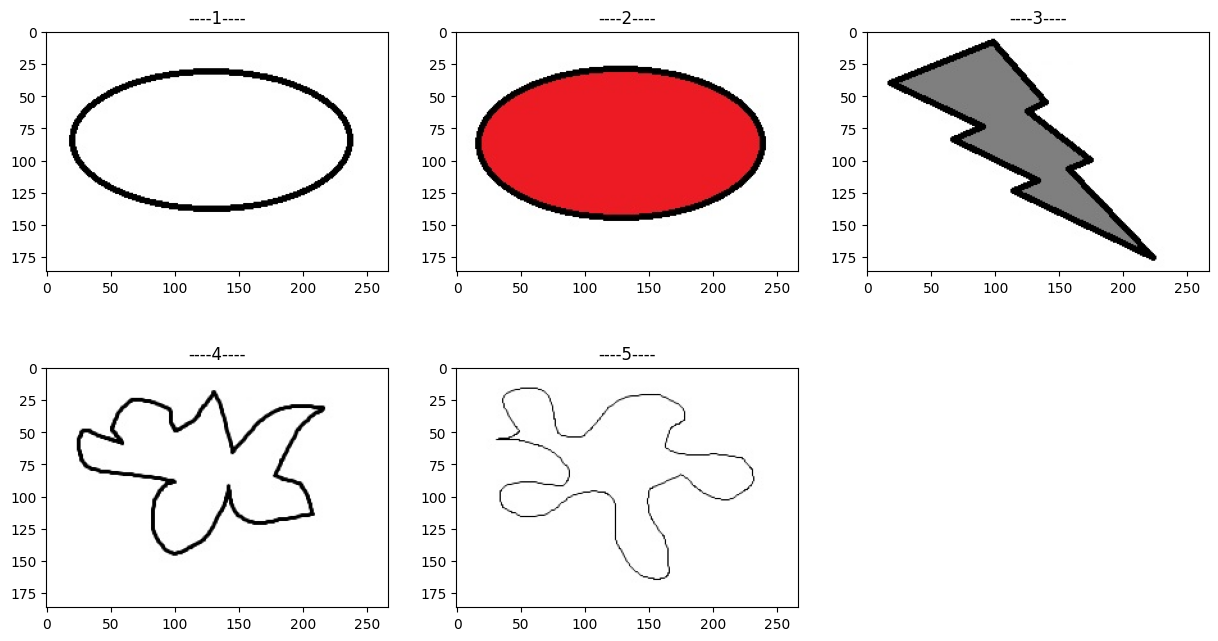

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].imshow(img1)
axes[0, 0].set_title('----1----')
axes[0, 1].imshow(img2) 
axes[0, 1].set_title('----2----')
axes[0, 2].imshow(img3)
axes[0, 2].set_title('----3----')
axes[1, 0].imshow(img4) 
axes[1, 0].set_title('----4----')
axes[1, 1].imshow(img5) 
axes[1, 1].set_title('----5----')
axes[1, 2].axis('off')
plt.show()

In [ ]:
from ipywidgets.widgets import Dropdown,Output,VBox

from IPython.display import display, clear_output

image_arrays = { '1': arr1, '2': arr2, '3': arr3, '4': arr4, '5': arr5, } 


dropdown_numbers = Dropdown(
    options=list(image_arrays.keys()),
    value='1',
    description='Выберите номер изображения:',
    disabled=False,
)
output_plot_widget = Output()

current_figure = None
current_axes = None

def onclick(event):
    global current_image_data
    if event.inaxes and current_image_data is not None:
        x, y = event.xdata, event.ydata
        radius = 1000 # Задайте желаемый радиус круга
        color = (1, 0, 0) # Красный цвет круга (RGB)

        # Создаем круг
        circle = plt.Circle((x, y), radius, color=color, fill=False, linewidth=2)
        current_axes.add_patch(circle)
        current_figure.canvas.draw_idle()

def display_selected_image_mpl(change):
    selected_number_str = change['new']
    image = image_arrays.get(selected_number_str)

    # Используем with output_plot_widget: для вывода в виджет
    with output_plot_widget:
        global current_axes, current_figure
        clear_output(wait=True) # Очищаем предыдущий вывод перед отрисовкой нового
        fig, ax = plt.subplots(figsize=(8, 8)) # Создаем фигуру и оси
        ax.imshow(image)
        ax.set_title(f"Изображение {selected_number_str}")
        ax.axis('off')

        current_figure = fig
        current_axes = ax

        # Подключаем обработчик события клика мыши
        fig.canvas.mpl_connect('button_press_event', onclick)

        plt.show() # plt.show() теперь будет отображать в output_plot_widget

dropdown_numbers.observe(display_selected_image_mpl, names='value')

# Первоначальный вывод изображения
display_selected_image_mpl({'new': dropdown_numbers.value})

# Отображаем виджеты
display(VBox([dropdown_numbers, output_plot_widget]))

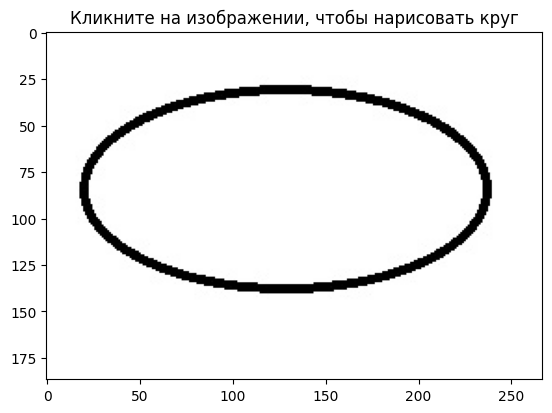

In [ ]:

import matplotlib.patches as patches

# Глобальная переменная для хранения осей, чтобы можно было добавлять круги
ax = None
# Глобальная переменная для хранения объекта изображения, чтобы его можно было обновлять
im = None

def onclick(event):
    global ax, im
    if event.inaxes:
        # event.xdata и event.ydata - координаты клика в данных осей
        center_x, center_y = int(event.xdata), int(event.ydata)
        print(f"Клик в координатах: x={event.xdata:.2f}, y={event.ydata:.2f}")
        # Определяем радиус круга. Можно сделать его фиксированным или зависящим от чего-то.
        radius = 20

        # Создаем объект круга
        # Обратите внимание: matplotlib ожидает (x, y, width, height) для прямоугольника,
        # из которого вырезается круг. Для круга мы используем Ellipse,
        # где center=(x, y) и width=height=2*radius.
        circle = patches.Circle((center_x, center_y), radius, edgecolor='red', facecolor='none', linewidth=2)

        # Добавляем круг на оси
        ax.add_patch(circle)

        # Перерисовываем холст, чтобы увидеть изменения
        plt.draw()

fig, ax = plt.subplots(1)
ax.imshow(img1)
ax.set_title("Кликните на изображении, чтобы нарисовать круг")

# Сохраняем ссылку на объект изображения для потенциального обновления (хотя в данном случае это не нужно)
im = ax.imshow(img1)

# Подключаем обработчик событий мыши
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [2]:
%matplotlib inline


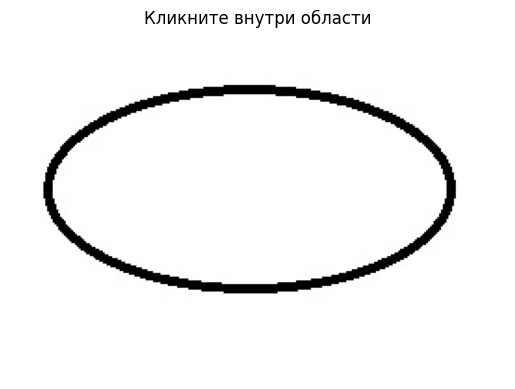

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ContourFinder:
    def __init__(self, image_path):
        self.original_image = cv2.imread(image_path)
        if self.original_image is None:
            raise FileNotFoundError(f"Не удалось загрузить изображение: {image_path}")

        self.image_display = self.original_image.copy()
        self.boundary_points = []
        self.start_point = None
        self.clicked_point = None
        self.region_color = None
        self.filled_color = (0, 255, 0)  # Цвет заполнения (зеленый)
        self.fill_alpha = 0.3 # Прозрачность заливки
        self.current_fill_level = 0 # Уровень заполнения (0 - нет, 1 - полностью)

        self.fig, self.ax = plt.subplots()
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.update_display()

    def update_display(self):
        self.ax.clear()
        # Отображаем исходное изображение
        self.ax.imshow(cv2.cvtColor(self.image_display, cv2.COLOR_BGR2RGB))
        self.ax.set_title("Кликните внутри области")
        self.ax.axis('off')
        self.fig.canvas.draw_idle()

    def get_start_boundary_point(self, start_x, start_y):
        height, width, _ = self.original_image.shape
        self.region_color = self.original_image[start_y, start_x]
        current_x = start_x

        # Двигаемся вправо, пока цвет не изменится
        while current_x < width and np.array_equal(self.original_image[start_y, current_x], self.region_color):
            current_x += 1

        if current_x < width:
            return (current_x, start_y)
        else:
            return None # Начальная точка не найдена (возможно, клик был на краю)

    def find_boundary(self, start_point):
        height, width, _ = self.original_image.shape
        x, y = start_point
        self.boundary_points = []
        
        # Направление движения (8 направлений: 0 - вправо, 1 - вниз-вправо, ...)
        # (dx, dy) для каждого направления
        directions = [(1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1)]
        
        # Начальное направление: двигаемся по границе, поэтому ищем первый пиксель с другим цветом
        # После нахождения начальной точки, нам нужно "развернуться", чтобы начать обход.
        # Если start_point это (x,y), то предыдущий пиксель был (x-1, y)
        # Текущее направление (0) - вправо. Нам нужно идти "влево" от этого направления.
        # "Лево" от вправо - это вверх-вправо (dir 1) или вверх (dir 2).
        # Для простоты, начнем с направления, которое вело нас к границе (в данном случае, вправо, направление 0)
        # и будем искать "левую" сторону.
        
        current_dir_index = 0 # Начальное направление (предполагаем, что мы уже на границе и идем вправо)
        
        # Ищем первое направление, которое не является цветом области
        for i in range(8):
            next_x = x + directions[i][0]
            next_y = y + directions[i][1]
            if 0 <= next_x < width and 0 <= next_y < height:
                if not np.array_equal(self.original_image[next_y, next_x], self.region_color):
                    current_dir_index = (i + 4) % 8 # Разворачиваемся на 180 градусов
                    break
            else: # Если следующий пиксель за границей, значит, текущее направление уже ведет к границе
                current_dir_index = (i + 4) % 8
                break

        x, y = start_point
        
        while True:
            self.boundary_points.append((x, y))
            
            # Пробуем идти "влево" относительно текущего направления
            # "Лево" для направления `d` это `(d - 1) % 8`
            for _ in range(8): # Пробуем все 8 направлений, начиная с "левого"
                test_dir_index = (current_dir_index - 1) % 8
                
                # Следующий пиксель, который мы будем проверять
                next_x = x + directions[test_dir_index][0]
                next_y = y + directions[test_dir_index][1]

                if 0 <= next_x < width and 0 <= next_y < height:
                    # Если пиксель соответствует цвету области, мы можем туда двигаться
                    if np.array_equal(self.original_image[next_y, next_x], self.region_color):
                        x, y = next_x, next_y
                        current_dir_index = test_dir_index # Обновляем текущее направление
                        break # Нашли новое направление, выходим из внутреннего цикла
                    # Если пиксель другого цвета, это может быть граница
                    else:
                        # Если пиксель не является цветом области, мы можем продолжить движение вперед
                        # Это может быть использовано для обработки сложных границ,
                        # но для простой границы "левой руки" мы ищем первое подходящее направление
                        pass
                else:
                    # Вышли за границы изображения, это тоже граница
                    pass
            else: # Если внутренний цикл завершился без break, значит, мы не смогли найти новое направление
                # Это может произойти, если мы оказались в тупике или вернулись в начало
                # Проверим, не вернулись ли мы в начальную точку
                if (x, y) == start_point:
                    break
                else:
                    # Это редкий случай, который может потребовать более сложного алгоритма
                    # Для простой задачи, мы можем остановиться или попробовать двигаться вперед
                    # Попробуем двигаться вперед (в текущем направлении)
                    next_x = x + directions[current_dir_index][0]
                    next_y = y + directions[current_dir_index][1]
                    if 0 <= next_x < width and 0 <= next_y < height:
                         if np.array_equal(self.original_image[next_y, next_x], self.region_color):
                             x, y = next_x, next_y
                         else:
                             # Если и вперед нельзя, то мы действительно в тупике
                             break
                    else:
                        break # Вышли за границы

            # Проверка на завершение (вернулись в начальную точку)
            if len(self.boundary_points) > 1 and (x, y) == start_point:
                break
            
            # Ограничение на количество точек, чтобы избежать бесконечных циклов в сложных случаях
            if len(self.boundary_points) > width * height:
                print("Предупреждение: Обнаружен потенциально бесконечный цикл.")
                break
                
        return self.boundary_points

    def fill_region(self, boundary_points):
        if not boundary_points:
            return

        # Создаем маску для заливки
        mask = np.zeros_like(self.original_image[:, :, 0]) # Черная маска
        
        # Рисуем полигон на маске, чтобы определить внутреннюю область
        cv2.fillPoly(mask, [np.array(boundary_points)], 255) # Заливаем белым внутри границы

        # Применяем заливку поверх исходного изображения
        # Учитываем уровень заполнения
        overlay = self.image_display.copy()
        color_to_fill = self.filled_color
        
        # Создаем цветной слой для заливки
        fill_layer = np.zeros_like(self.original_image)
        fill_layer[:] = color_to_fill
        
        # Применяем маску к заливаемому слою
        filled_part = cv2.bitwise_and(fill_layer, fill_layer, mask=mask)

        # Смешиваем с текущим изображением
        # alpha = self.current_fill_level * self.fill_alpha
        alpha = self.fill_alpha # Фиксированная прозрачность заливки

        # Создаем изображение, где закрашена только область внутри границы
        # Используем альфа-смешивание
        temp_image = self.image_display.copy()
        
        # Находим пиксели, которые должны быть закрашены
        indices_to_fill = np.where(mask == 255)
        
        # Применяем смешивание только к этим пикселям
        temp_image[indices_to_fill[0], indices_to_fill[1]] = cv2.addWeighted(
            self.image_display[indices_to_fill[0], indices_to_fill[1]], 1 - alpha,
            np.array(color_to_fill).reshape(1, 1, 3).astype(np.uint8)[0, 0], alpha, 0
        )
        
        self.image_display = temp_image
        
        # Рисуем границу поверх всего
        # Преобразуем точки границы в numpy массив для рисования
        pts = np.array(boundary_points, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(self.image_display, [pts], isClosed=True, color=(0, 0, 255), thickness=2) # Красный цвет границы

    def on_click(self, event):
        if event.inaxes != self.ax:
            return

        if self.clicked_point is not None:
            # Если уже была кликнута область, мы хотим добавить новую заливку
            # но нужно найти новую начальную точку границы
            pass # Продолжаем, так как новое кликанье может начать новую заливку

        self.clicked_point = (int(event.xdata), int(event.ydata))
        start_x, start_y = self.clicked_point

        # Проверяем, что клик был внутри изображения
        height, width, _ = self.original_image.shape
        if not (0 <= start_x < width and 0 <= start_y < height):
            print("Клик за пределами изображения.")
            return

        # Получаем начальную точку границы, двигаясь вправо
        self.start_point = self.get_start_boundary_point(start_x, start_y)

        if self.start_point:
            print(f"Начальная точка границы: {self.start_point}")
            self.boundary_points = self.find_boundary(self.start_point)
            
            if self.boundary_points:
                # Рисуем границу и заливаем область
                self.fill_region(self.boundary_points)
                self.update_display()
            else:
                print("Не удалось найти границу.")
        else:
            print("Не удалось найти начальную точку границы.")

# --- Пример использования ---
if __name__ == "__main__":
    # Создайте тестовое изображение или используйте существующее
    # Пример создания простого изображения:
    img_size = 400
    test_image = np.zeros((img_size, img_size, 3), dtype=np.uint8)
    
    # Рисуем несколько областей разных цветов
    cv2.rectangle(test_image, (50, 50), (150, 150), (255, 0, 0), -1) # Синий квадрат
    cv2.circle(test_image, (250, 250), 70, (0, 255, 0), -1)       # Зеленый круг
    cv2.rectangle(test_image, (300, 100), (380, 200), (0, 0, 255), -1) # Красный прямоугольник
    
    # Добавляем фон
    test_image[0:50, :] = (100, 100, 100)
    test_image[img_size-50:, :] = (100, 100, 100)
    test_image[:, 0:50] = (100, 100, 100)
    test_image[:, img_size-50:] = (100, 100, 100)
    
    # Сохраняем тестовое изображение
    cv2.imwrite("test_image.png", test_image)

    # Загружаем изображение
    image_path = "image1.jpg" # Укажите путь к вашему изображению

    try:
        finder = ContourFinder(image_path)
        plt.show()
    except FileNotFoundError as e:
        print(e)

Задание 3. Выполнить градиентное окрашивание произвольного треугольника, у которого все три вершины разного цвета, используя алгоритм растеризации треугольника.